In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import numpy as np

In [2]:
gdp_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/fgdp_analysis.csv')

In [19]:
gdp_df.groupby('Genotype')['Date'].count()

Genotype
KO    7
WT    8
Name: Date, dtype: int64

In [3]:
gdp_df.columns

Index(['Date', 'Genotype', 'fGDP_amp', 'fGDP_halfwidth', 'fGDP_interval',
       'MUA_fq', 'inter_fGDP_MUA_fq', 'intra_fGDP_MUA_fq'],
      dtype='object')

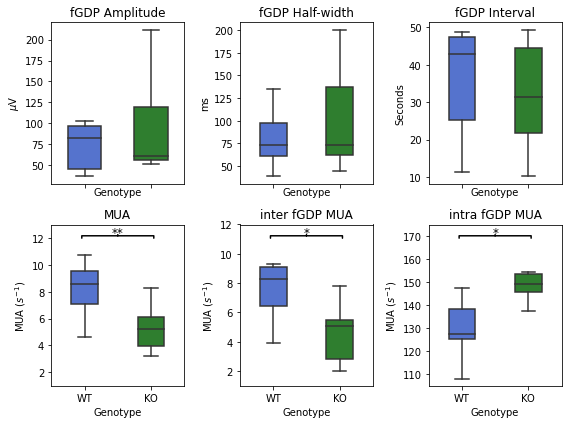

In [52]:
fig, axs = plt.subplots(2, 3, sharex = True, figsize = (8,6))

sns.boxplot(x = 'Genotype', y = 'fGDP_amp', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width  = 0.5, ax = axs[0,0], showfliers = False)
axs[0,0].set_title('fGDP Amplitude')
axs[0,0].set_ylabel(r'$\mu$V')

sns.boxplot(x = 'Genotype', y = 'fGDP_halfwidth', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[0,1], showfliers = False)
axs[0,1].set_title('fGDP Half-width')
axs[0,1].set_ylabel('ms')

sns.boxplot(x = 'Genotype', y = 'fGDP_interval', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[0,2], showfliers = False)
axs[0,2].set_title('fGDP Interval')
axs[0,2].set_ylabel('Seconds')

sns.boxplot(x = 'Genotype', y = 'MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,0], showfliers = False)
axs[1,0].set_ylim(1,13)
axs[1,0].annotate('**', xy=(0.5, .93), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.2', lw=1.5, color='k'))
axs[1,0].set_title('MUA')
axs[1,0].set_ylabel(r'MUA ($s^{-1}$)')

sns.boxplot(x = 'Genotype', y = 'inter_fGDP_MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,1], showfliers = False)
axs[1,1].set_ylim(1,12)
axs[1,1].annotate('*', xy=(0.5, .93), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.2', lw=1.5, color='k'))
axs[1,1].set_title('inter fGDP MUA')
axs[1,1].set_ylabel(r'MUA ($s^{-1}$)')

sns.boxplot(x = 'Genotype', y = 'intra_fGDP_MUA_fq', data = gdp_df, palette = ['royalblue', 'forestgreen'], order = ['WT', 'KO'], width = 0.4, ax = axs[1,2], showfliers = False)
axs[1,2].set_ylim(105,175)
axs[1,2].annotate('*', xy=(0.5, .93), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.2', lw=1.5, color='k'))
axs[1,2].set_title('intra fGDP MUA')
axs[1,2].set_ylabel(r'MUA ($s^{-1}$)')

plt.tight_layout()


### Amplitude

In [5]:
pg.normality(data = gdp_df, dv = 'fGDP_amp', group = 'Genotype')

,W,pval,normal
WT,0.850656,0.096738,True
KO,0.751247,0.013074,False


In [6]:
pg.mwu(x = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_amp'][gdp_df['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,25.0,two-sided,0.772337,0.107143,0.553571


### Half-width

In [7]:
pg.normality(data = gdp_df, dv = 'fGDP_halfwidth', group = 'Genotype')

,W,pval,normal
WT,0.866608,0.139611,True
KO,0.888963,0.269298,True


In [8]:
pg.ttest(x = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_halfwidth'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.554937,11.733521,two-sided,0.58936,"[-75.9, 45.15]",0.291095,0.485,0.08176


### Interval

In [9]:
pg.normality(data = gdp_df, dv = 'fGDP_interval', group = 'Genotype')

,W,pval,normal
WT,0.863930,0.131365,True
KO,0.912896,0.416288,True


In [10]:
pg.ttest(x = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'WT'], y = gdp_df['fGDP_interval'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.93322,11.29565,two-sided,0.370226,"[-14.14, 35.08]",0.465495,0.582,0.132781


### MUA General

In [11]:
pg.normality(data = gdp_df, dv = 'MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.956179,0.773019,True
KO,0.944131,0.676160,True


In [12]:
pg.ttest(x = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['MUA_fq'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.074184,12.983009,two-sided,0.008889,"[0.89, 5.09]",1.578846,5.672,0.804936


### MUA inter-GDP

In [13]:
pg.normality(data = gdp_df, dv = 'inter_fGDP_MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.856575,0.110972,True
KO,0.937613,0.617325,True


In [14]:
pg.ttest(x = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['inter_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.030406,12.455339,two-sided,0.010074,"[0.89, 5.36]",1.575777,5.343,0.80343


### MUA intra-GDP

In [23]:
ko_outliers = pg.madmedianrule(gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype']=='KO'])

In [26]:
gdp_df['intra_fGDP_MUA_fq'].iloc[7] = np.nan

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
pg.normality(data = gdp_df, dv = 'intra_fGDP_MUA_fq', group = 'Genotype')

,W,pval,normal
WT,0.940087,0.611941,True
KO,0.786741,0.044509,False


In [28]:
pg.mwu(x = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'WT'], y = gdp_df['intra_fGDP_MUA_fq'][gdp_df['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,5.0,two-sided,0.016925,0.791667,0.895833


In [26]:
psc_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/spPSC_means.csv')

In [30]:
psc_df

,Date,Genotype,Peak,Inst Fq,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,50718,WT,30.73,6.03,NaN,NaN,NaN
1,071118c,KO,20.18,5.36,NaN,NaN,NaN
2,011118a,KO,38.50,4.68,NaN,NaN,NaN
3,011118b,KO,29.60,10.64,NaN,NaN,NaN
4,071118b,KO,28.29,4.35,NaN,NaN,NaN
5,071118c,KO,20.84,7.38,NaN,NaN,NaN
6,081118a,KO,21.60,6.45,NaN,NaN,NaN
7,081118b,KO,42.70,13.40,NaN,NaN,NaN
8,100718,WT,27.40,8.00,NaN,NaN,NaN
9,200718a,WT,55.10,13.59,NaN,NaN,NaN


In [27]:
psc_df.columns

Index(['Date', 'Genotype', 'Peak', 'Inst Fq', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

Text(0, 0.5, 'Hz')

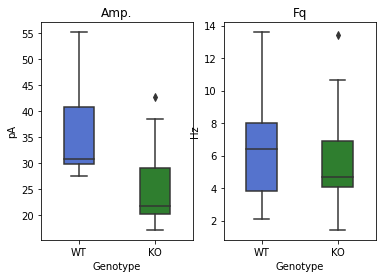

In [37]:
fig_2, axs = plt.subplots(1,2)
sns.boxplot(x = 'Genotype', y = 'Peak', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[0])
axs[0].set_title('Amp.')
axs[0].set_ylabel('pA')

sns.boxplot(x = 'Genotype', y = 'Inst Fq', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[1])
axs[1].set_title('Fq')
axs[1].set_ylabel('Hz')

In [39]:
pg.normality(data = psc_df, dv = 'Peak', group= 'Genotype')

,W,pval,normal
WT,0.808560,0.025563,False
KO,0.837011,0.028857,False


In [42]:
x = psc_df['Peak'][psc_df['Genotype']=='WT']
y = psc_df['Peak'][psc_df['Genotype']=='KO']
pg.mwu(x, y, 'greater')

,U-val,tail,p-val,RBC,CLES
MWU,81.0,greater,0.009257,-0.636364,0.818182


In [44]:
pg.normality(data = psc_df, dv = 'Inst Fq', group= 'Genotype')

,W,pval,normal
WT,0.939777,0.579559,True
KO,0.909186,0.238530,True


In [45]:
xx = psc_df['Inst Fq'][psc_df['Genotype']=='WT']
yy = psc_df['Inst Fq'][psc_df['Genotype']=='KO']
pg.mwu(xx, yy)

,U-val,tail,p-val,RBC,CLES
MWU,60.0,two-sided,0.447412,-0.212121,0.606061
